In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


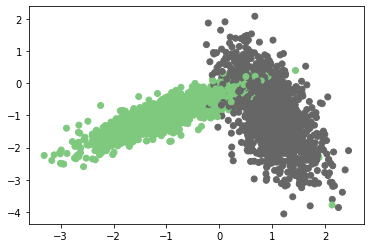

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test,cmap="Accent_r")
plt.show()

# Implementing Custom RandomSearchCV

In [3]:
#Reference:
#https://stackoverflow.com/questions/61818704/building-a-custom-randomsearchcv-using-python
#https://www.kaggle.com/bhushanyadav07/implementing-custom-randomsearchcv

import random
def generateRandonParams(params_range):
    paramValues = random.sample(range(1,params_range),10)
    paramValues.sort()
    return paramValues

def generate_train_cv_indices(x_train,fold,folds):
    boundary = int(len(x_train)/ (folds))
    return list(set(list(range((boundary*fold), (boundary*(fold+1))))))

def RandomSearchCV(x_train, y_train, params_range, classifier, folds):
    trainscores = [] # List of final train scores for all parameters using k-fold
    testscores  = [] # List of final test scores for all parameters using k-fold  
    
    #Generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params"
    params_list = generateRandonParams(params_range)
#     print(params_list)
    params = {'n_neighbors':params_list}
    
    #Devide numbers ranging from  0 to len(X_train) into groups= folds   
    for param_ in tqdm(params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = []
        for fold in range(0, folds):
            test_indices = generate_train_cv_indices(x_train,fold,folds)
            train_indices =  list(set(list(range(1, len(x_train)))) - set(test_indices))
            # selecting the data points based on the train_indices and test_indices
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = param_
            classifier.fit(X_train, Y_train)

            Y_Predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_Predicted))

            Y_Predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_Predicted))

        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
        
    #4. return both "train_scores" and "test_scores"
    return trainscores, testscores, params

100%|██████████| 10/10 [00:05<00:00,  1.74it/s]

{'n_neighbors': [10, 18, 28, 30, 33, 37, 39, 40, 42, 45]}


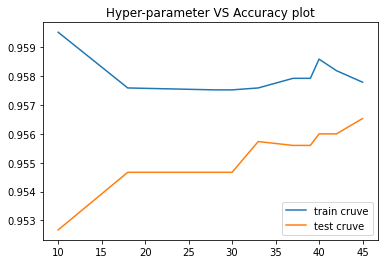

In [4]:
#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values 
# into "train_score", and "cv_scores"
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

neigh = KNeighborsClassifier()
params_range = 50
folds = 3

trainscores,testscores,params = RandomSearchCV(X_train, y_train, params_range, neigh, folds)
print(params)
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS Accuracy plot')
plt.legend()
plt.show()


In [5]:
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last 
# cell of reference notebook

# Taken below code from reference notebook 

def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

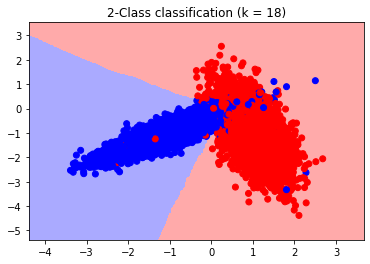

In [6]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 18)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

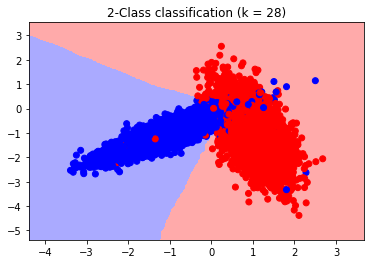

In [7]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 28)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

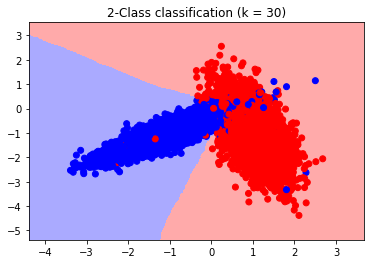

In [8]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 30)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)